# Show Me Your Sound 🎵👀

The `librosa` Python library is specifically designed for audio analysis and music information retrieval. It provides a comprehensive set of tools and functions for working with audio data, making it easier to extract meaningful information from audio files and allows users to load audio files, perform various audio analysis tasks such as feature extraction, pitch estimation, and beat tracking, and visualize the results.

## Spectral Features

### What is a Mel Spectrogram

1. **Representation**: A mel spectrogram is a representation of an audio signal where the frequency axis is transformed to a mel scale[5].
2. **Purpose**: The primary purpose of a mel spectrogram is to capture the spectral characteristics of the audio signal in a way that's more relevant to human auditory perception. It emphasizes important regions of the audio spectrum.
3. **Visualization**: In a mel spectrogram, both the vertical (frequency) and horizontal (time) axes are typically transformed. The frequency axis is divided into mel-frequency bins, and the color intensity represents the magnitude of the signal's energy in each bin.
4. **Use Cases**: Mel spectrograms are widely used in speech processing, music genre classification, and various audio analysis tasks where capturing perceptually meaningful features is important. They are particularly useful when the goal is to analyze and classify sounds based on their timbral characteristics.
5. **Mel Scale** is a perceptual scale of pitch (or frequency) based on how humans perceive differences in pitch. It is not linear like the traditional frequency scale (Hz). Instead, it is designed to be more consistent with human hearing. For example, small frequency changes in the low-frequency range are more perceptually significant than in the high-frequency range.
6. **Mel Filter Banks**: In Mel spectrogram computation, the continuous spectrum is divided into a set of triangular frequency bands, known as Mel filter banks. These filter banks are designed to mimic the frequency resolution of the human auditory system. Each filter bank has a unique shape, and together they cover the entire Mel scale.

### Create a Mel Spectrogram

To create a Mel spectrogram, you apply these Mel filter banks to the original audio signal. At each time step, the energy in each filter bank is computed. This results in a set of values that represent how much energy is present in each Mel-filtered frequency band at that moment in time. These values are then used to create the Mel spectrogram.

The main advantage of using a Mel spectrogram is that it provides a more perceptually relevant representation of audio data. By applying the Mel scale and filter banks, it can help to highlight important features of the audio, particularly in the context of speech and music analysis. Mel spectrograms are commonly used in tasks such as speech recognition, music genre classification, and sound event detection.

Let's do exactly that:

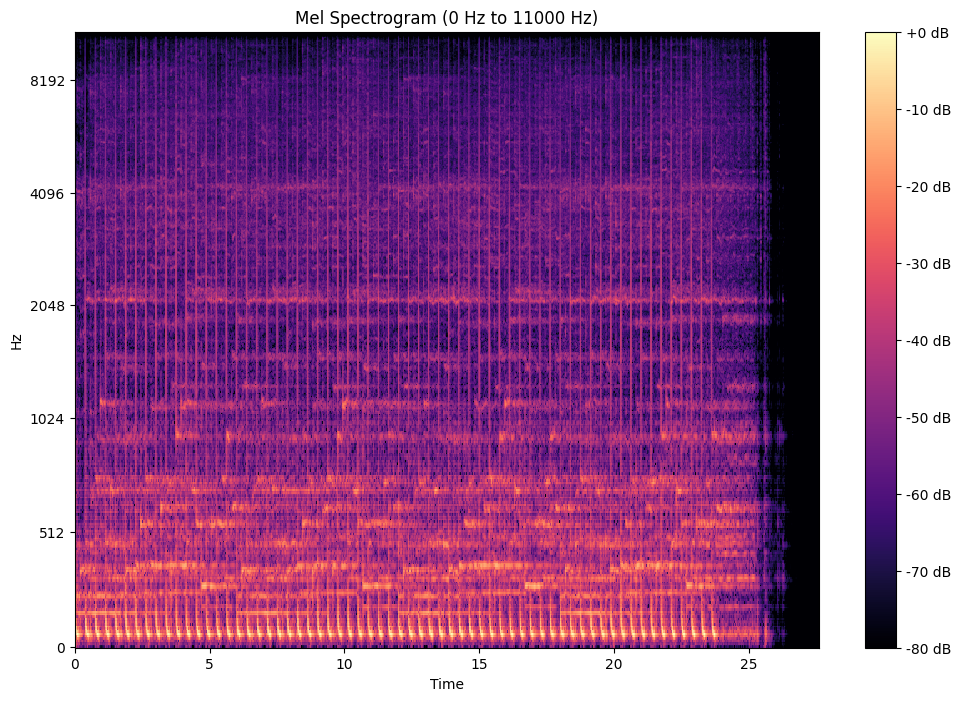

In [31]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sys # Will be used by later examples.

# Path to the audio file
audio_file = "../_Data/Sample.wav"

# Load the audio file
y, sr = librosa.load(audio_file)

# Adjust the frequency range from 0 Hz to 11 KHz
fmin = 0
fmax = 11000

# Increase the number of mel filter banks (n_mels) to increase the frequency resolution.
n_mels = 512
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmin=fmin, fmax=fmax)

# Convert to decibels
db_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(db_spectrogram, x_axis='time', y_axis='mel', sr=sr, fmin=fmin, fmax=fmax)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram ({fmin} Hz to {fmax} Hz)')
plt.show()

1. **Loading**: The script loads the audio file using `librosa.load()`. It reads the audio waveform into `y` and stores the sample rate in `sr`.
2. **Frequency Range Adjustment**: The frequency range for the spectrogram is adjusted. `fmin` is set to 0 Hz (the lower bound), and `fmax` is set to 11,000 Hz (or 11 KHz, the upper bound). This determines the range of frequencies that will be analyzed.
3. **Mel Filter Banks**: The number of Mel filter banks used for the Mel spectrogram is determined by `n_mels`, which is set to 512 in this example. Increasing this value results in a higher frequency resolution in the spectrogram.
4. **Spectrogram Calculation**: The Mel spectrogram is computed using librosa.feature.melspectrogram(). It takes the audio waveform `y`, the sample rate `sr`, and parameters for the frequency range and filter banks. The result is stored in `spectrogram`.
5. **Conversion to Decibels**: The spectrogram is then converted to decibels using `librosa.power_to_db()`. This transformation enhances the visualization of the spectrogram, as human perception of loudness is better represented on a logarithmic scale.
6. **Plotting the Spectrogram**: Finally, the script uses `matplotlib` to create a figure and display the Mel spectrogram using `librosa.display.specshow()`. The spectrogram is shown with time on the x-axis and Mel frequency on the y-axis. A color bar is included to indicate dB levels, and the title of the plot displays the frequency range used for analysis.
7. **Displaying the Plot**: The `plt.show()` function displays the generated spectrogram as a graphical plot.

### What is a Log-Spectrogram

A logarithmic spectrogram highlights amplitude variations instead of emphasizing perceptually relevant frequency components.

1. **Representation**: A logarithmic spectrogram is a representation of an audio signal where the magnitude or power of the frequencies is transformed into a logarithmic scale. It's typically displayed in decibels (dB).
2. **Purpose**: The primary purpose of a logarithmic spectrogram is to emphasize the dynamic range of the audio signal. It highlights the variations in amplitude across different frequency components and time frames.
3. **Visualization**: In a logarithmic spectrogram, the vertical axis often represents frequency in a linear manner (i.e., equally spaced frequency bins), while the horizontal axis represents time. The color intensity indicates the magnitude of the dB values, with brighter colors corresponding to higher amplitudes.
4. **Use Cases**: Logarithmic spectrograms are commonly used for tasks like audio visualization, audio effects analysis, and detecting transient events in audio signals.

### Creating a Log-Spectrogram

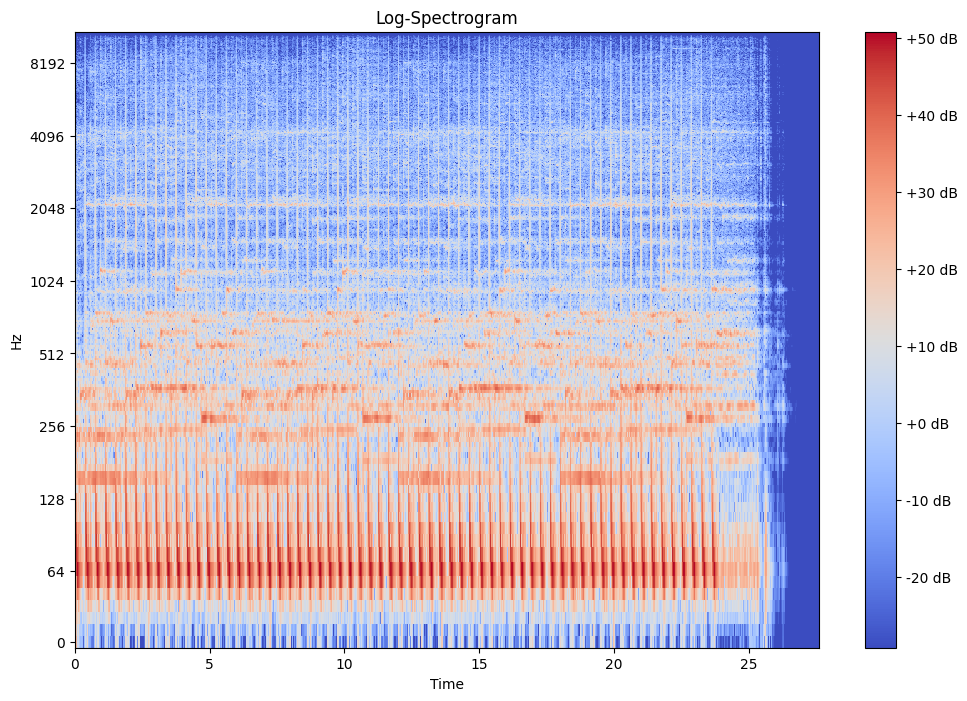

In [32]:
# Compute the standard spectrogram
spectrogram = np.abs(librosa.stft(y))

# Convert to a logarithmic scale (log-spectrogram)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# Plot the log-spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(log_spectrogram, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Spectrogram')
plt.show()

1. **Compute the Spectrogram**: The code starts by computing the standard spectrogram of an audio signal `y` using the `librosa.stft()` function. The spectrogram is a 2D representation of the audio signal that shows how its frequency content changes over time. It's represented as a complex-valued matrix, where the magnitude of each element represents the magnitude or power of the frequencies at a specific time and frequency bin.
2. **Convert to Logarithmic Scale**: After computing the standard spectrogram, the code converts it to a logarithmic scale. This transformation is performed to enhance the visualization and make the fine details of the spectrogram more perceptually clear. The conversion is done using the `librosa.amplitude_to_db()` function, which computes the logarithm of the spectrogram values, effectively converting them from linear to decibel (dB) scale. This is a common practice in audio analysis to highlight the dynamic range of the signal.
3. **Plot the Log-Spectrogram**: Finally, the code uses Matplotlib to create a figure for displaying the log-spectrogram. It uses `librosa.display.specshow()` to display the log-spectrogram as an image. The x-axis represents time, the y-axis represents a logarithmic frequency scale, and the color intensity (shading) corresponds to the magnitude of the dB values. The color bar on the right side of the plot provides a reference for the dB values.

### Chromagram

A chromagram, short for "chromatic diagram," is a representation of the twelve different pitch classes in an audio signal or piece of music. It is a useful feature in music analysis and audio processing. Each bin in the chromagram corresponds to a specific pitch class, typically defined by the twelve different notes in Western music (e.g., C, C#, D, D#, E, F, F#, G, G#, A, A#, B).

The chromagram provides information about the distribution of pitch classes in a piece of music, which can be helpful for tasks such as music analysis, chord recognition, and key detection. It's often used in music information retrieval systems and music analysis software.

To create a chromagram, the audio signal is divided into short overlapping frames, and the pitch content of each frame is analyzed to determine which pitch classes are present. The result is a time-varying representation of pitch classes, which can be further processed for various music analysis tasks.

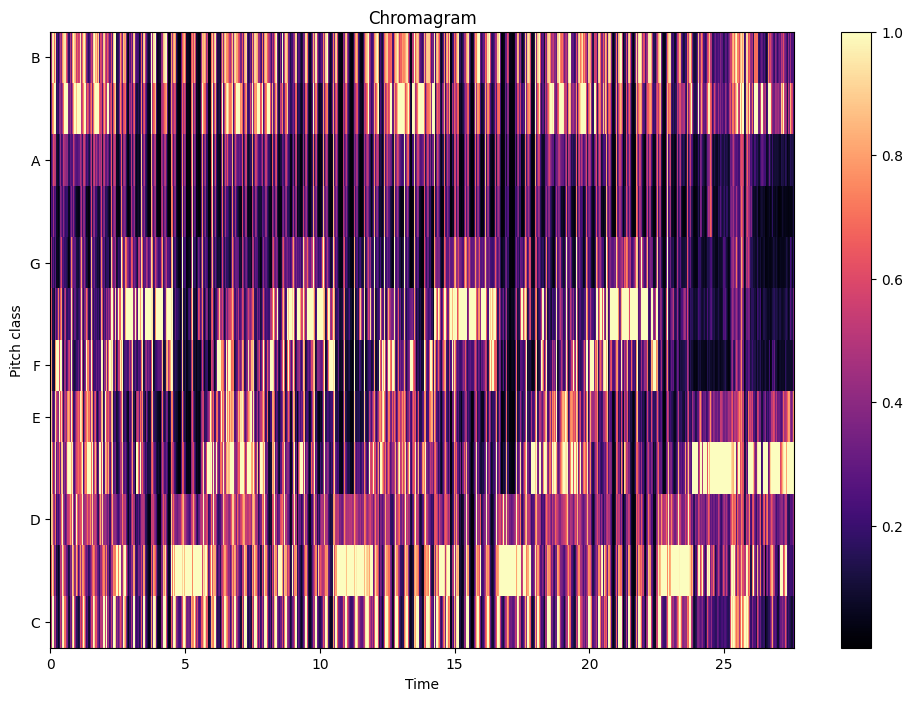

In [33]:
# Compute the chromagram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the chromagram
plt.figure(figsize=(12, 8))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()

1. **Compute the Chromagram**: It uses the `librosa.feature.chroma_stft` function from the Librosa library to compute the chromagram of the audio signal `y` with a given sampling rate `sr`. The chromagram is essentially a representation of the pitch content of the audio over time. Each column in the resulting matrix represents a different time frame, and each row corresponds to one of the twelve pitch classes in Western music (C, C#, D, D#, E, F, F#, G, G#, A, A#, B).
2. **Plot the Chromagram**: The code then plots the computed chromagram using `matplotlib`. It creates a figure with a size of 12x8 inches to display the chromagram. The `librosa.display.specshow` function is used to visualize the chromagram. It specifies that the x-axis should represent time, and the y-axis should represent the pitch classes (chroma). The `plt.colorbar()` adds a color bar to the plot to indicate the intensity of each pitch class. Finally, the title of the plot is set to 'Chromagram'.

### CENS

 **Chroma Energy Normalized Statistics** is a feature representation used in music analysis and audio signal processing. It enhances the chromagram by applying a series of processing steps, including:

1. **Local Energy Normalization**: This step normalizes the energy of each chroma feature in small, overlapping windows. This helps reduce the sensitivity to variations in loudness.
2. **Short-Time Statistics**: CENS computes statistics (e.g., mean and variance) over short time frames to capture the temporal dynamics of the chroma features.
3. **Histogram Equalization**: The resulting statistics are often further normalized or equalized to emphasize patterns and reduce the impact of outliers.

CENS is particularly useful for music analysis tasks such as music genre classification, mood recognition, and audio similarity retrieval. It provides a more robust and compact representation of chroma features that is less sensitive to variations in tempo, dynamics, and timbre. This makes it suitable for content-based music retrieval and classification tasks.

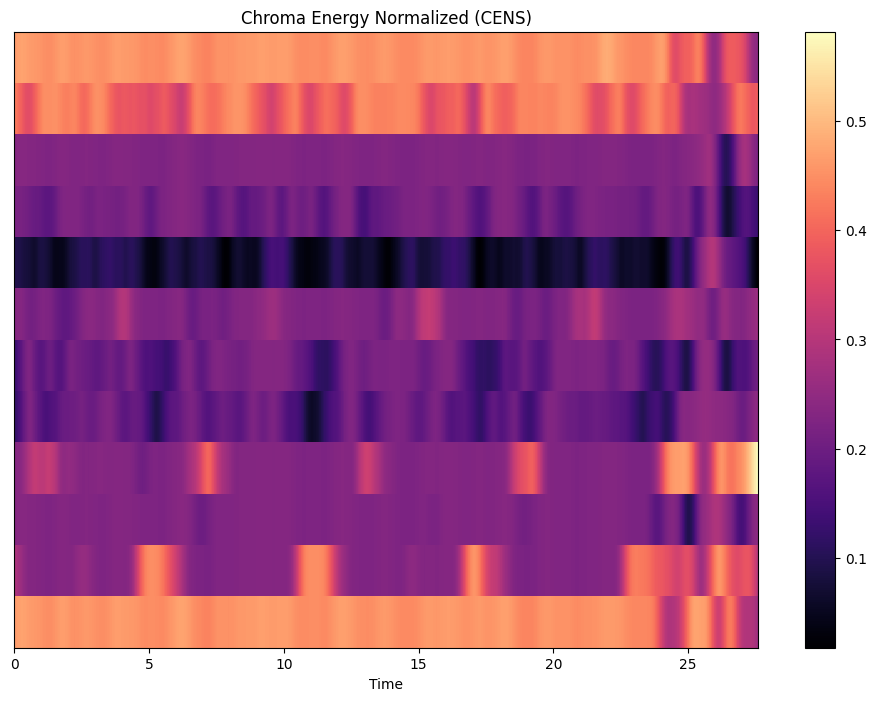

In [34]:
# Compute Chroma Energy Normalized (CENS)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

# Plot the Chroma CENS
plt.figure(figsize=(12, 8))
librosa.display.specshow(chroma_cens, x_axis='time')
plt.colorbar()
plt.title('Chroma Energy Normalized (CENS)')
plt.show()

1. **Compute CENS**: `librosa.feature.chroma_cens(y=y, sr=sr)` computes the CENS representation of the audio signal `y` with a given sampling rate `sr`. CENS is a feature representation that enhances the chromagram by applying energy normalization and statistical processing to capture chroma feature dynamics over time.
2. **Plot the Chroma CENS**:
    * The code creates a Matplotlib figure with a size of 12x8 inches to prepare for plotting.
    * `librosa.display.specshow(chroma_cens, x_axis='time')` visualizes the CENS representation. It displays the CENS values over time, where the x-axis represents time, and the y-axis represents different chroma bins (pitch classes).
    * `plt.colorbar()` adds a colorbar to the plot, providing a scale for interpreting the color values in the CENS representation.
    * `plt.title('Chroma Energy Normalized (CENS)')` sets the title of the plot to indicate that it shows the CENS representation.